In [3]:
# 使用矩阵分解的方法求解线性回归
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

sess = tf.Session()

In [4]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [5]:
print(x_vals.shape)
print(y_vals.shape)

(100,)
(100,)


In [8]:
x_vals_column = np.transpose(np.array([x_vals]))
ones_column = np.transpose(np.array([np.repeat(1, 100)]))

In [9]:
print(x_vals_column.shape)
print(ones_column.shape)

(100, 1)
(100, 1)


In [10]:
A = np.column_stack([x_vals_column, ones_column])
b = np.transpose(np.array([y_vals]))

In [11]:
print(A.shape)
print(b.shape)

(100, 2)
(100, 1)


In [12]:
print(A[:5, :])

[[0.        1.       ]
 [0.1010101 1.       ]
 [0.2020202 1.       ]
 [0.3030303 1.       ]
 [0.4040404 1.       ]]


In [13]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [14]:
print(A_tensor)
print(b_tensor)

Tensor("Const:0", shape=(100, 2), dtype=float64)
Tensor("Const_1:0", shape=(100, 1), dtype=float64)


In [15]:
# 进行矩阵分解
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

In [16]:
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)

In [17]:
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [18]:
solution_eval = sess.run(sol2)
print(solution_eval)

[[0.96727671]
 [0.1034364 ]]


In [19]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]

In [20]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

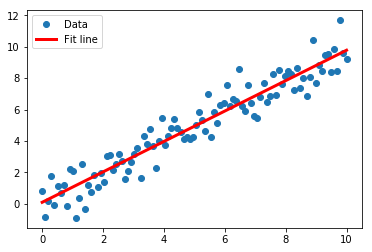

In [22]:
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Fit line', linewidth=3)
plt.legend()
plt.show()

In [23]:
sess.close()